In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784')

In [ ]:
mnist

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [ ]:
mnist.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
mnist.data[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [ ]:
# Total Samples = 70000, Total Pixles = 784

mnist.data.shape

(70000, 784)

In [ ]:
mnist.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
mnist.target = [int(i) for i in mnist.target]

In [ ]:
mnist.target[0:10]

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]

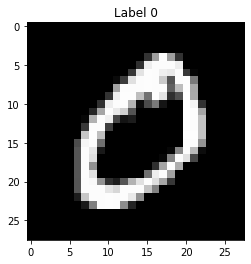

In [ ]:
plt.imshow(np.reshape(mnist.data[1], (28, 28)), cmap = 'gray')
plt.title("Label %i" %mnist.target[1])
plt.show()

In [ ]:
np.reshape(mnist.data[1], (28,28))

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [ ]:
X = mnist.data
Y = mnist.target

**Cross Validation**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 0 )

In [ ]:
X_train.shape

(59500, 784)

In [ ]:
X_test.shape

(10500, 784)

**Logistic Regression**

**Solver = LBFGS**

In [ ]:
from sklearn.linear_model import LogisticRegression

#Parameters for multi-class classification

logit_model = LogisticRegression(multi_class = 'multinomial', max_iter = 1e3, C = 1, solver = 'sag')

In [ ]:
logit_model.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000.0,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logit_model.score(X_test, Y_test)

0.9131428571428571

**Prediction**

In [ ]:
yhat = logit_model.predict(X_test)

In [ ]:
yhat

array([0, 4, 1, ..., 2, 4, 2])

**Classification Model**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(Y_test, yhat)

array([[1019,    0,    1,    1,    3,    8,   12,    1,    6,    1],
       [   0, 1156,    7,    4,    1,    5,    2,    3,   12,    2],
       [   9,   16,  968,   22,   14,    4,   16,    9,   31,    3],
       [   4,    4,   38,  925,    1,   29,    1,   10,   25,   15],
       [   4,    3,    5,    2,  923,    1,   11,   11,    8,   35],
       [  13,    2,    9,   30,   10,  791,   21,    4,   32,   12],
       [  13,    3,    8,    0,    9,   16,  988,    2,    3,    1],
       [   4,    5,   16,    6,   12,    3,    1, 1023,    6,   44],
       [   5,   17,   10,   24,    6,   25,   10,    3,  895,   15],
       [   4,    5,    5,   13,   32,    7,    1,   36,    9,  900]])

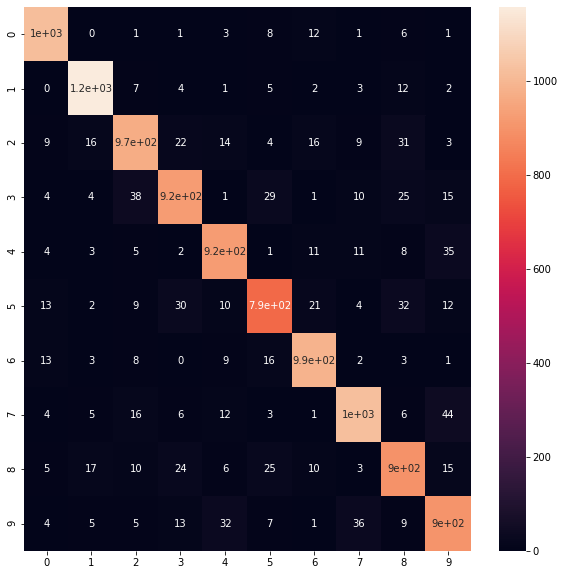

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(confusion_matrix(Y_test, yhat), annot = True)

In [ ]:
print(classification_report(Y_test, yhat))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1052
           1       0.95      0.97      0.96      1192
           2       0.91      0.89      0.90      1092
           3       0.90      0.88      0.89      1052
           4       0.91      0.92      0.92      1003
           5       0.89      0.86      0.87       924
           6       0.93      0.95      0.94      1043
           7       0.93      0.91      0.92      1120
           8       0.87      0.89      0.88      1010
           9       0.88      0.89      0.88      1012

    accuracy                           0.91     10500
   macro avg       0.91      0.91      0.91     10500
weighted avg       0.91      0.91      0.91     10500



In [ ]:
import cv2

In [ ]:
# 0 - Gray Scale

img = cv2.imread('/content/2.png', 0)

In [ ]:
img.shape

(541, 484)

In [ ]:
img_data = cv2.resize(img, (28,28))

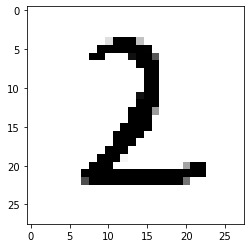

In [ ]:
plt.imshow(img_data, cmap = 'gray')

In [ ]:
# Bitwise operation not for image samples 
img_data = cv2.bitwise_not(img_data)

Text(0.5, 1.0, 'Label O/P: 2')

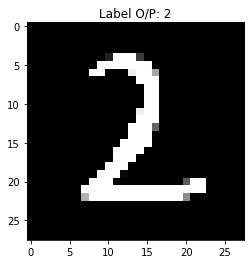

In [ ]:
plt.imshow(img_data, cmap = 'gray')
img_new = np.reshape(img_data, (1, 784))
plt.title("Label O/P: %i" %logit_model.predict(img_new))

In [ ]:
# 0 - Gray Scale

img3 = cv2.imread('/content/3.png', 0)

In [ ]:
img3.shape

(625, 713)

In [ ]:
img_data3 = cv2.resize(img3, (28,28))

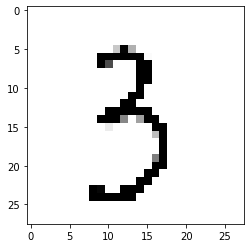

In [ ]:
plt.imshow(img_data3, cmap = 'gray')

In [ ]:
# Bitwise operation not for image samples 
img_data3 = cv2.bitwise_not(img_data3)

Text(0.5, 1.0, 'Label O/P: 3')

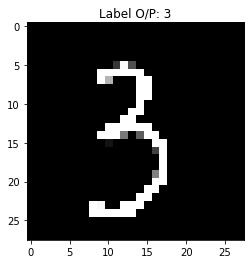

In [ ]:
plt.imshow(img_data3, cmap = 'gray')
img_new3 = np.reshape(img_data3, (1, 784))
plt.title("Label O/P: %i" %logit_model.predict(img_new3))